In [1]:
%matplotlib notebook
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from data_loader import produce_dataset, get_dataloaders, dataset_plot
from train import *
from test_function import *
from model_nn import Koopman
import numpy as np
import torch
initial_out = sys.stdout

In [2]:
path = './dataset/state-[2. 2. 3.]_input-[1.5 0.5]_0.2x500000_Ts_0.01'
batch_size = 1000
train_loader, val_loader, test_loader = get_dataloaders(path,batch_size)

  0%|          | 0/300 [00:00<?, ?it/s]

Trainer created.


Epoch 20: 100%|██████████| 300/300 [00:13<00:00, 21.45it/s, loss=0.169]


<IPython.core.display.Javascript object>


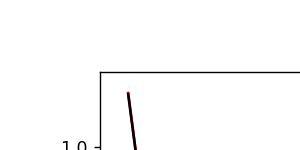

100%|██████████| 100/100 [00:03<00:00, 28.29it/s]


Loss score: 0.02263119800016284.
encoder_[3, 32, 64, 7]_decoder_[10, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 5]_batch_1000


In [3]:
# get parameters
K = 7
arg = {
    'encoder':[3,32,64,K],
    'decoder':[K+3,128,64,32,3],
    'hyper':[1.0,1.0,0.3,0.000000001,0.000000001,0.000000001,5]
}

# start training
epochs=20
file_name = train_the_model(train_loader, val_loader, arg, batch_size, epochs)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, file_name)
print(file_name)

<IPython.core.display.Javascript object>


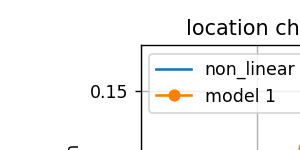

In [4]:
path = './dataset/state-[2. 2. 3.]_input-[1.5 0.5]_0.2x500000_Ts_0.01'
file_names = [
    'encoder_[3, 32, 64, 7]_decoder_[10, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 5]_batch_1000'
]
result_sample(path,file_names,index=240)